In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [101]:
df = pd.read_csv("/home/rajatraj/Downloads/student_performance_new.csv")
df

,Sl.No.,USN,STUDENT NAME,TestI,TestII,TestIII,TestTotal,TestResult,Quiz1,Quiz2,Compensatory,Quiz,QuizResult,Test + Quiz,Assignment,AssignmentResult,Result
1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1
6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1,0
7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1,0
8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1,1
9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1,1
10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1,1


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 55
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl.No.            54 non-null     object 
 1   USN               54 non-null     object 
 2   STUDENT NAME      54 non-null     int64  
 3   TestI             54 non-null     int64  
 4   TestII            54 non-null     int64  
 5   TestIII           54 non-null     float64
 6   TestTotal         54 non-null     int64  
 7   TestResult        54 non-null     float64
 8   Quiz1             54 non-null     float64
 9   Quiz2             53 non-null     float64
 10  Compensatory      54 non-null     float64
 11  Quiz              54 non-null     int64  
 12  QuizResult        54 non-null     float64
 13  Test + Quiz       54 non-null     int64  
 14  Assignment        54 non-null     int64  
 15  AssignmentResult  54 non-null     int64  
 16  Result            54 non-null     int64  
dtypes: f

In [103]:

df.head(10)

,Sl.No.,USN,STUDENT NAME,TestI,TestII,TestIII,TestTotal,TestResult,Quiz1,Quiz2,Compensatory,Quiz,QuizResult,Test + Quiz,Assignment,AssignmentResult,Result
1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1
6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1,0
7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1,0
8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1,1
9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1,1
10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1,1


In [104]:

df.columns

Index(['Sl.No.', 'USN', 'STUDENT NAME', 'TestI', 'TestII', 'TestIII',
       'TestTotal', 'TestResult', 'Quiz1', 'Quiz2', 'Compensatory', 'Quiz',
       'QuizResult', 'Test + Quiz', 'Assignment', 'AssignmentResult',
       'Result'],
      dtype='object')

In [105]:
df.isna().sum()

Sl.No.              0
USN                 0
STUDENT NAME        0
TestI               0
TestII              0
TestIII             0
TestTotal           0
TestResult          0
Quiz1               0
Quiz2               1
Compensatory        0
Quiz                0
QuizResult          0
Test + Quiz         0
Assignment          0
AssignmentResult    0
Result              0
dtype: int64

In [106]:
df['Quiz2'] = df['Quiz2'].fillna(df['Quiz2'].mean())

In [107]:
df.isna().sum()

Sl.No.              0
USN                 0
STUDENT NAME        0
TestI               0
TestII              0
TestIII             0
TestTotal           0
TestResult          0
Quiz1               0
Quiz2               0
Compensatory        0
Quiz                0
QuizResult          0
Test + Quiz         0
Assignment          0
AssignmentResult    0
Result              0
dtype: int64

In [108]:
df.head(10)

,Sl.No.,USN,STUDENT NAME,TestI,TestII,TestIII,TestTotal,TestResult,Quiz1,Quiz2,Compensatory,Quiz,QuizResult,Test + Quiz,Assignment,AssignmentResult,Result
1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.000000,16.0,1,45.000000,14,13,1,1
2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.000000,15.5,1,45.500000,14,13,1,1
3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,9.490566,12.0,1,40.666667,14,13,1,1
4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.000000,13.0,1,38.333333,13,13,1,1
5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.000000,16.0,1,47.333333,13,14,1,1
6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.000000,16.5,1,43.833333,14,14,1,0
7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.000000,15.0,1,50.000000,15,15,1,0
8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.000000,16.0,1,33.000000,13,14,1,1
9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.000000,13.0,1,37.333333,14,14,1,1
10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.000000,15.0,1,38.333333,14,14,1,1


In [109]:
y=df['Result']
x=df[['TestTotal','Quiz','AssignmentResult']]

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
DecisionTree = DecisionTreeClassifier(random_state=42)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [112]:
#train accuracy
y_train_pred = DecisionTree.predict(x_train)  
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy:", train_accuracy)
print(f'Train accuracy:", {train_accuracy:.4f}')

Train accuracy: 0.8837209302325582
Train accuracy:", 0.8837


In [113]:
#test accuracy
y_test_pred = DecisionTree.predict(x_test)  
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)
print(f'Test accuracy:", {test_accuracy:.4f}')

Test accuracy: 0.9090909090909091
Test accuracy:", 0.9091


In [114]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5 1]
 [0 5]]


<Axes: >

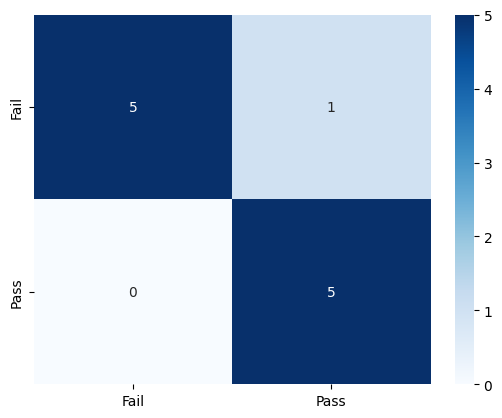

In [115]:

sns.heatmap(conf_matrix, annot=True,fmt='g',cmap="Blues", xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])

In [116]:
classfication_rep =classification_report(y_test,y_test_pred)
print(classfication_rep)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



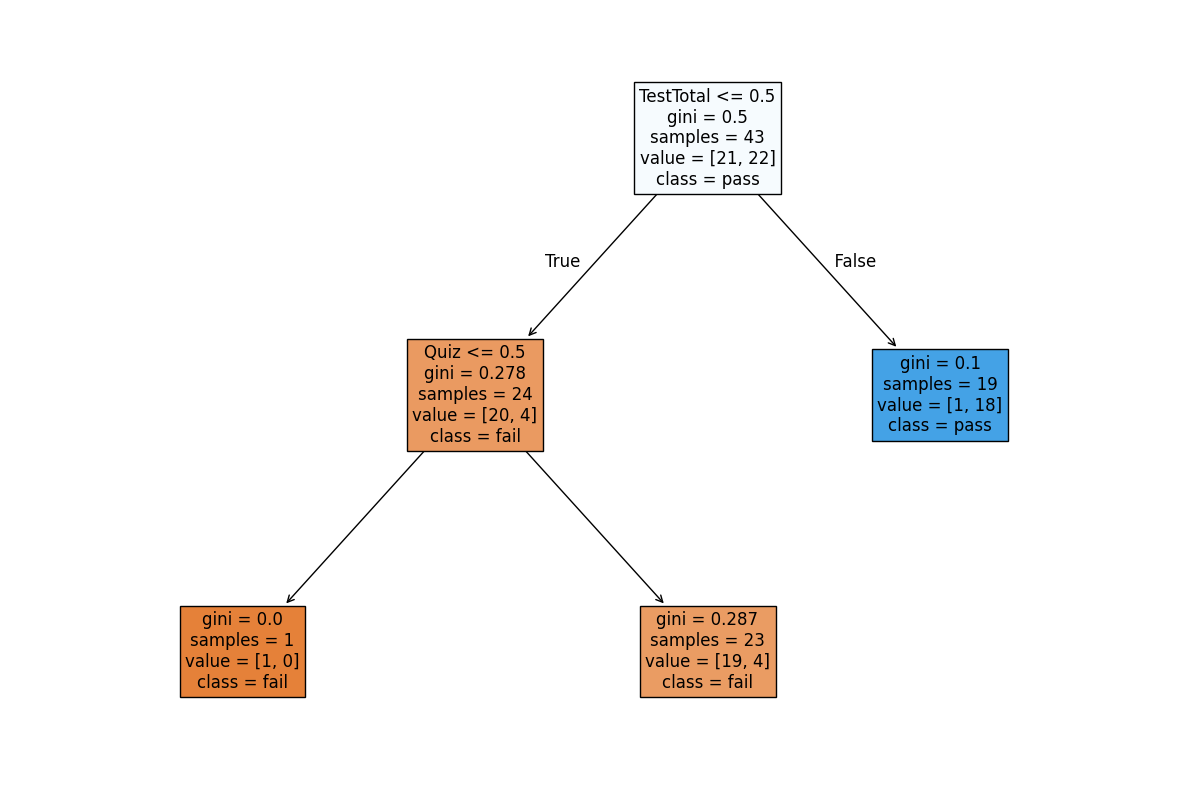

In [117]:
plt.figure(figsize=(15,10))
plot_tree(DecisionTree,feature_names=x.columns.tolist(),class_names=['fail','pass'],filled=True , fontsize=12)
plt.show()

In [118]:
#lab6

In [119]:
df = df.drop(columns=['Sl.No.', 'USN', 'STUDENT NAME'])
x=df.drop(['Result'],axis=1)
y = df['Result']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [120]:
gs=GridSearchCV(estimator=rf,param_grid=pg,cv=3,n_jobs=-1,verbose=2)
gs.fit(x_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [121]:
from sklearn.model_selection import GridSearchCV

pg={
    'n_estimators' : [100,200,300],
    'max_depth' : [10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]}
best_pg=gs.best_params_
print(best_pg)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [122]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [123]:
#best_rf
best_rf = RandomForestClassifier(**best_pg,random_state=42)
best_rf.fit(x_train,y_train)
# alternative way
# best_rf=gs.best_estimator_
# print(best_rf)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [124]:
#model evaluation
y_pred =best_rf.predict(x_test)

In [125]:

#accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(f'Accuracy:{accuracy:.4f}')
print('Accuracy:{:.2f}%'.format(accuracy*100))


Accuracy: 0.8181818181818182
Accuracy:0.8182
Accuracy:81.82%


[[4 2]
 [0 5]]


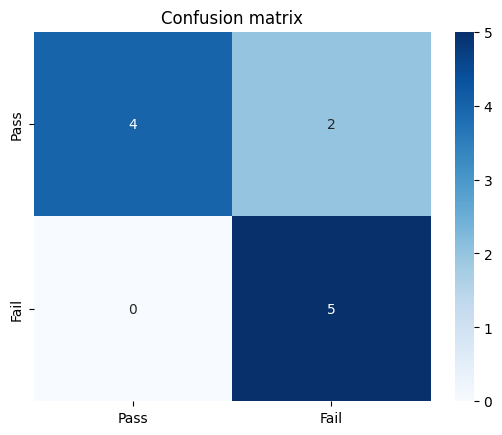

In [126]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,fmt='g',annot=True,cmap="Blues",xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.title('Confusion matrix')
plt.show()

In [127]:
#classification Report
report=classification_report(y_test,y_pred)
print("Classification Report")
print(report)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.71      1.00      0.83         5

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



In [128]:
#feature importance 
featureImportant= pd.Series(rf.feature_importances_,index=x.columns)
print(featureImportant)


TestI               0.180745
TestII              0.106008
TestIII             0.212392
TestTotal           0.133837
TestResult          0.028012
Quiz1               0.037849
Quiz2               0.026562
Compensatory        0.039879
Quiz                0.000067
QuizResult          0.180824
Test + Quiz         0.033106
Assignment          0.020719
AssignmentResult    0.000000
dtype: float64


In [129]:
sorted_feature = featureImportant.sort_values(ascending=False)
print("sorted_feature")
print(sorted_feature)

sorted_feature
TestIII             0.212392
QuizResult          0.180824
TestI               0.180745
TestTotal           0.133837
TestII              0.106008
Compensatory        0.039879
Quiz1               0.037849
Test + Quiz         0.033106
TestResult          0.028012
Quiz2               0.026562
Assignment          0.020719
Quiz                0.000067
AssignmentResult    0.000000
dtype: float64


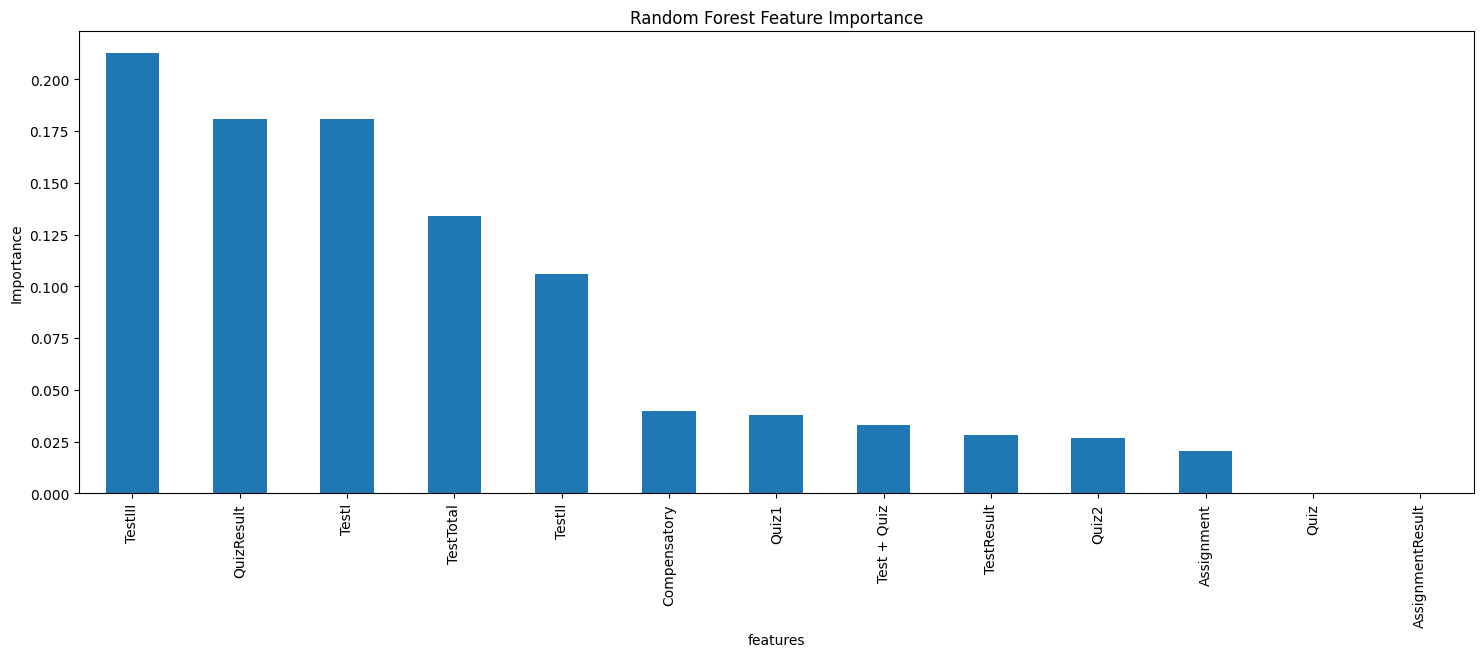

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total

In [130]:
plt.figure(figsize=(18,6))
sorted_feature.plot.bar()
plt.xlabel('features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()